In [6]:
import pickle

# import torch_utils
import os 
os.chdir("/home/bean/DragVideo/DragGAN")

In [7]:
path = "/home/bean/DragVideo/Data_store/Stylegan3_1_files/stylegan3-t-ffhqu-256x256.pkl"
with open(path,'rb') as f:
    model = pickle.load(f)

In [ ]:
model 


In [11]:
model.keys()

dict_keys(['training_set_kwargs', 'G', 'D', 'G_ema', 'augment_pipe', 'kwargs'])

In [16]:
model['G'].synthesis

SynthesisNetwork(
  w_dim=512, num_ws=16,
  img_resolution=256, img_channels=3,
  num_layers=14, num_critical=2,
  margin_size=10, num_fp16_res=4
  (input): SynthesisInput(
    w_dim=512, channels=512, size=[36, 36],
    sampling_rate=16, bandwidth=2
    (affine): FullyConnectedLayer(in_features=512, out_features=4, activation=linear)
  )
  (L0_36_512): SynthesisLayer(
    w_dim=512, is_torgb=False,
    is_critically_sampled=False, use_fp16=False,
    in_sampling_rate=16, out_sampling_rate=16,
    in_cutoff=2, out_cutoff=2,
    in_half_width=6, out_half_width=6,
    in_size=[36, 36], out_size=[36, 36],
    in_channels=512, out_channels=512
    (affine): FullyConnectedLayer(in_features=512, out_features=512, activation=linear)
  )
  (L1_36_512): SynthesisLayer(
    w_dim=512, is_torgb=False,
    is_critically_sampled=False, use_fp16=False,
    in_sampling_rate=16, out_sampling_rate=16,
    in_cutoff=2, out_cutoff=2.82843,
    in_half_width=6, out_half_width=5.17157,
    in_size=[36, 36]

In [21]:

    def get_network(self, pkl, key, **tweak_kwargs):
        data = self._pkl_data.get(pkl, None)
        if data is None:
            print(f'Loading "{pkl}"... ', end='', flush=True)
            try:
                with dnnlib.util.open_url(pkl, verbose=False) as f:
                    data = legacy.load_network_pkl(f)
                print('Done.')
            except:
                data = CapturedException()
                print('Failed!')
            self._pkl_data[pkl] = data
            self._ignore_timing()
        if isinstance(data, CapturedException):
            raise data

        orig_net = data[key]
        cache_key = (orig_net, self._device, tuple(sorted(tweak_kwargs.items())))
        net = self._networks.get(cache_key, None)
        if net is None:
            try:
                if 'stylegan2' in pkl:
                    from training.networks_stylegan2 import Generator
                elif 'stylegan3' in pkl:
                    from training.networks_stylegan3 import Generator
                elif 'stylegan_human' in pkl:
                    from stylegan_human.training_scripts.sg2.training.networks import Generator
                else:
                    raise NameError('Cannot infer model type from pkl name!')

                print(data[key].init_args)
                print(data[key].init_kwargs)
                if 'stylegan_human' in pkl:
                    net = Generator(*data[key].init_args, **data[key].init_kwargs, square=False, padding=True)
                else:
                    net = Generator(*data[key].init_args, **data[key].init_kwargs)
                net.load_state_dict(data[key].state_dict())
                net.to(self._device)
            except:
                net = CapturedException()
            self._networks[cache_key] = net
            self._ignore_timing()
        if isinstance(net, CapturedException):
            raise net
        return net



SyntaxError: import * only allowed at module level (1761103044.py, line 48)

In [67]:
def get_network(pkl,device='cuda'):
    with open(pkl, 'rb') as f:
        network = pickle.load(f)['G_ema'].to(device)
    return network

In [68]:
def pass_to_G(G,latent_path,device='cuda'):
    ws = torch.load(latent_path)[0,0].unsqueeze(0).to(device)


In [26]:
G = get_network('/home/bean/DragVideo/Data_store/Stylegan3_1_files/stylegan3-t-ffhqu-256x256.pkl')


In [73]:
import torch
device = 'cuda:0'

pkl = '/home/bean/DragVideo/Data_store/Stylegan3_1_files/stylegan3-t-ffhqu-256x256.pkl'
latent_path = "/home/bean/DragVideo/Data_store/data/PTI_results/embeddings/barcelona/PTI/000/0.pt"


In [83]:
label = None 
trunc_psi = 0
noise_mode = 'const'


# img, feat = G(ws, label, truncation_psi=trunc_psi, noise_mode=noise_mode, input_is_w=True, return_feature=True)
img = G(ws, label, truncation_psi=trunc_psi, noise_mode=noise_mode)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


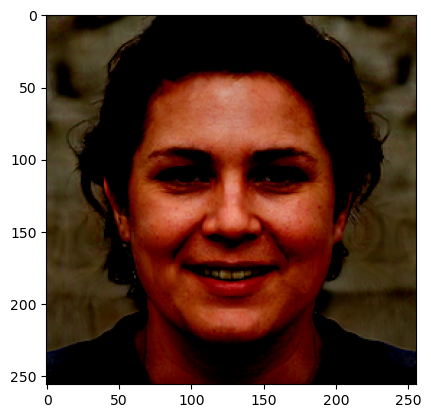

In [84]:
import matplotlib.pyplot as plt
plt.imshow(img.detach().cpu().squeeze().permute(1,2,0))

In [56]:
img.shape

torch.Size([18, 3, 256, 256])